In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set()

%matplotlib inline

## Data Pre-processing

In [4]:
data = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6]})

In [13]:
data.head()

,A,B
0,1,4
1,2,5
2,3,6


In [14]:
data.tail()

,A,B
0,1,4
1,2,5
2,3,6


In [7]:
data.describe()

,A,B
count,3.0,3.0
mean,2.0,5.0
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
50%,2.0,5.0
75%,2.5,5.5
max,3.0,6.0


In [11]:
data.dtypes

A    int64
B    int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
A    3 non-null int64
B    3 non-null int64
dtypes: int64(2)
memory usage: 176.0 bytes


In [24]:
data.isna().sum() # Or data.isna().sum()

A    0
B    0
dtype: int64

In [5]:
scaler = MinMaxScaler()

data_out = scaler.fit_transform(data)

In [25]:
# Example parse `ds` as datetimes, also set as dataframe index for visualisation purposes
# data['yearmonth'] = data['yearmonth'].apply(lambda d: pd.to_datetime(d, format='%d/%m/%Y')) <- require lambda function if specifying date format
# data.set_index(['yearmonth'],inplace=True)

# Or if applying to existing column
# data.loc[:, 'yearmonth'] = data.loc[:, 'yearmonth'].apply(pd.to_datetime)

In [ ]:
# Finding time delta
# data.loc[:, 'year_delta'] = data['yearmonth'].apply(lambda x: relativedelta(datetime.now(), x).years)

## EDA

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

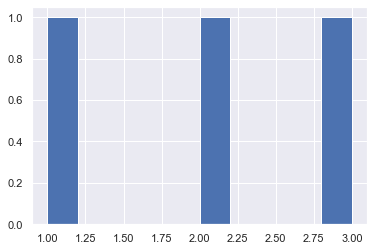

In [26]:
plt.hist(data['A'])

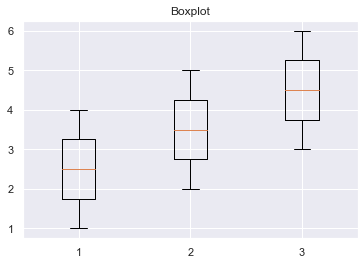

In [29]:
plt.title('Boxplot')
plt.boxplot(data)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb16c6da990>,
      dtype=object)

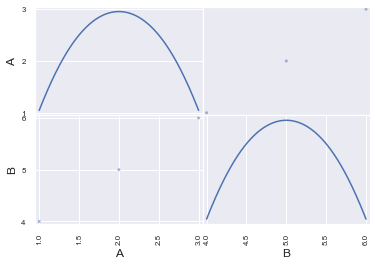

In [12]:
pd.plotting.scatter_matrix(data, diagonal='kde')

In [30]:
data.corr()

,A,B
A,1.0,1.0
B,1.0,1.0


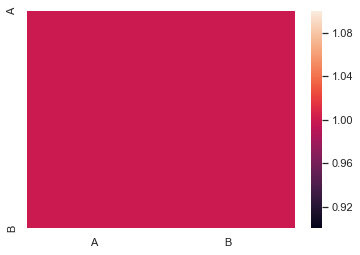

In [31]:
sns.heatmap(data.corr())

In [23]:
train = data[:-3] # ignore validation set
test = data[-3:]

In [32]:
# One-hot encoding
# data = pd.get_dummies(data, prefix=['month'], columns=['month'], drop_first=True)
# data.head()

## Modelling

In [16]:
# Linear regression
lm = smf.ols('B ~ A', data = data).fit()

In [17]:
lm.summary()

/Users/thomasmartin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      B   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.207e+29
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.83e-15
Time:                        18:10:32   Log-Likelihood:                 96.796
No. Observations:                   3   AIC:                            -189.6
Df Residuals:                       1   BIC:                            -191.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0000   6.22e-15   4.83e+14      0.000       3.000       3.000
A              1.0000   2.88e-15   3.47e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.238
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.354
Skew:                          -0.382   Prob(JB):                        0.838
Kurtosis:                       1.500   Cond. No.                         6.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'B')

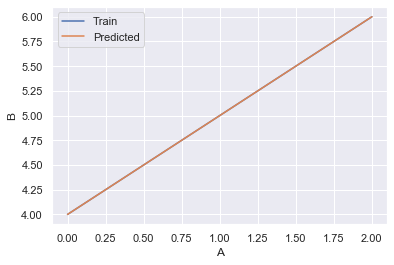

In [21]:
plt.plot(data['B'])
plt.plot(lm.predict(data['A']))
plt.legend(['Train','Predicted'])
plt.xlabel('A')
plt.ylabel('B')

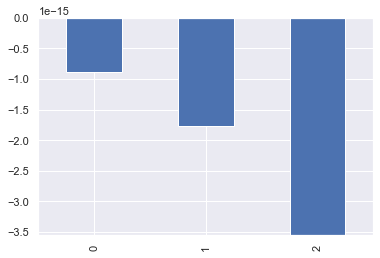

In [22]:
lm.resid.plot(kind = 'bar')

## Evaluation